In [1]:
%matplotlib inline
from IPython.display import display, HTML
from analysis import Analysis
from models import *
analysis = Analysis('weather', title='04-Remove20', missing_type='remove', missing_percent=0.2, missing_seed=3, logger=display)
analysis.load_data()

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Now setting the features and predictor to just be the avg temperature value.

In [2]:
predictor = 'actual_mean_temp'
features = [predictor]
analysis.set_feature_predictor_columns(features, predictor)
analysis.train_test_split()

'Number of train data points: 242'

'Number of test data points: 60'

Set some parameters that are used by some of the models

In [3]:
# The number of days to chunk inputs by
NUM_DAYS = 5

# 
NUM_FEATURES = len(analysis.features)

Going to try each different model.

# Raw Data

Raw Data means that the model simply takes the data as a sequence and no data manipulation is performed.

## ARIMA

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1516.305, BIC=1533.750, Fit time=1.563 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1611.779, BIC=1625.735, Fit time=0.457 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1543.042, BIC=1556.998, Fit time=1.009 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1517.603, BIC=1538.536, Fit time=2.254 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1621.322, BIC=1635.278, Fit time=0.317 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=1517.571, BIC=1538.505, Fit time=5.852 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1519.567, BIC=1543.990, Fit time=7.243 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1505.081, BIC=1526.015, Fit time=2.066 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_orde

'Train Error: 5.39690610138  Num NaN: 0'

'Test Error: 7.31824732498    Num NaN: 0'

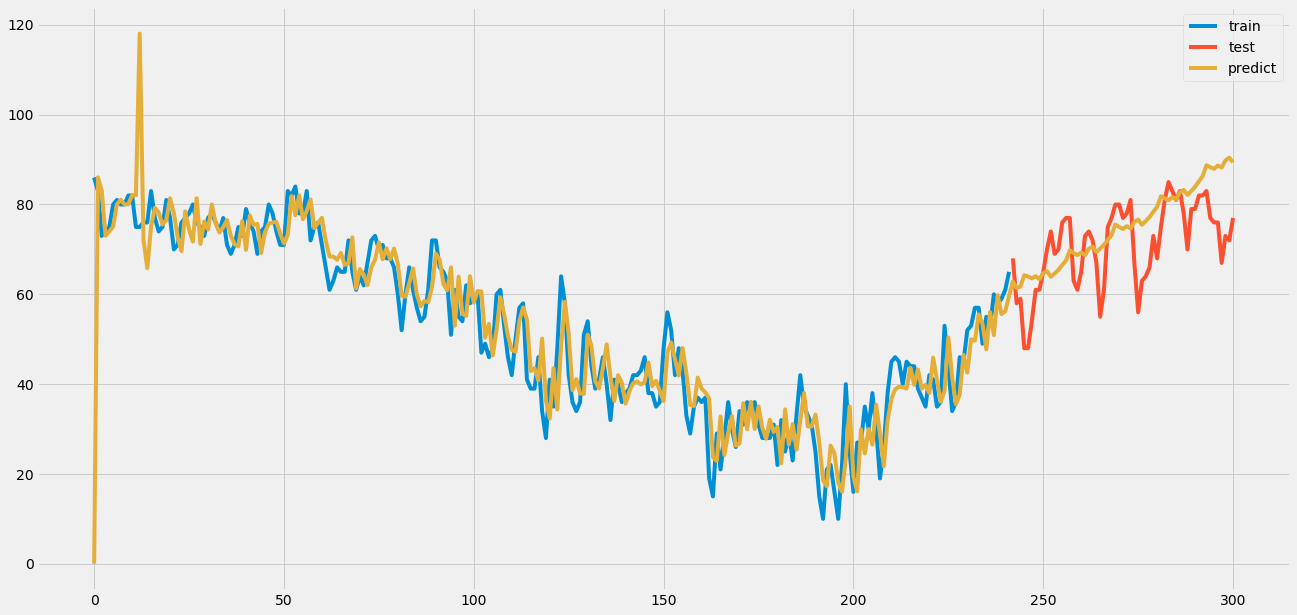

In [4]:
model = ARIMA(analysis, use_features=False)
analysis.run_model(model, name='ARIMA')

'Train Error: 4.47520661157  Num NaN: 0'

'Test Error: 5.09830508475    Num NaN: 0'

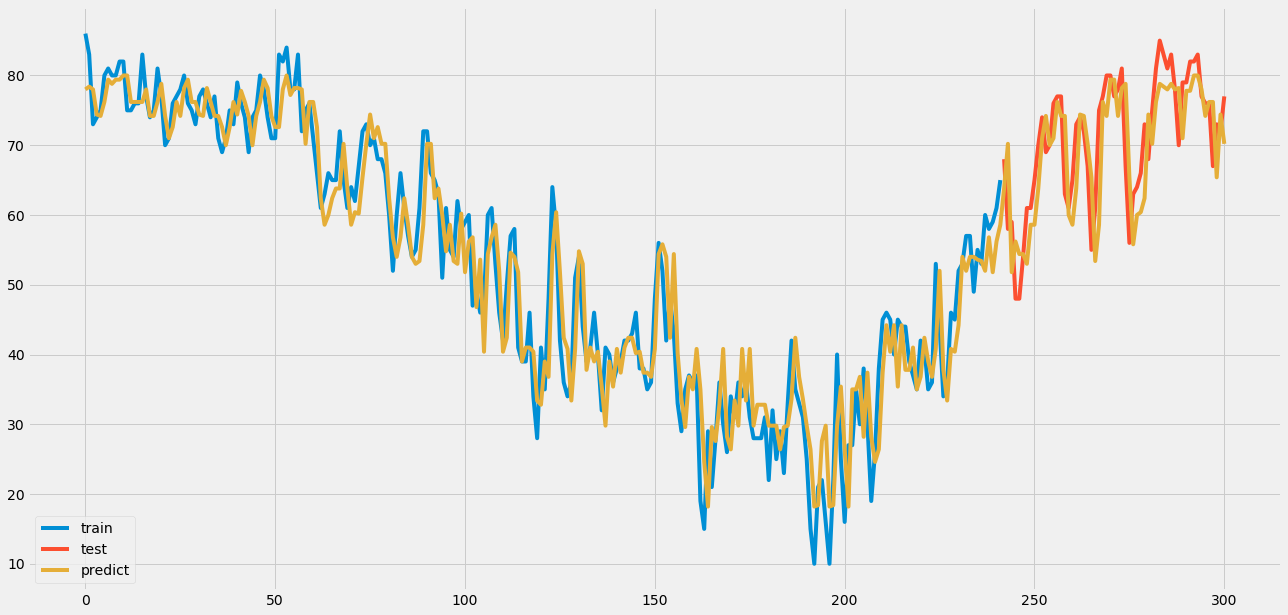

In [5]:
from sklearn.neighbors import KNeighborsRegressor
model = Regressor(analysis, KNeighborsRegressor)
analysis.run_model(model, name='KNN')

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


'Train Error: 3.42992809275e+12  Num NaN: 0'

'Test Error: 4.62675595629e+12    Num NaN: 0'

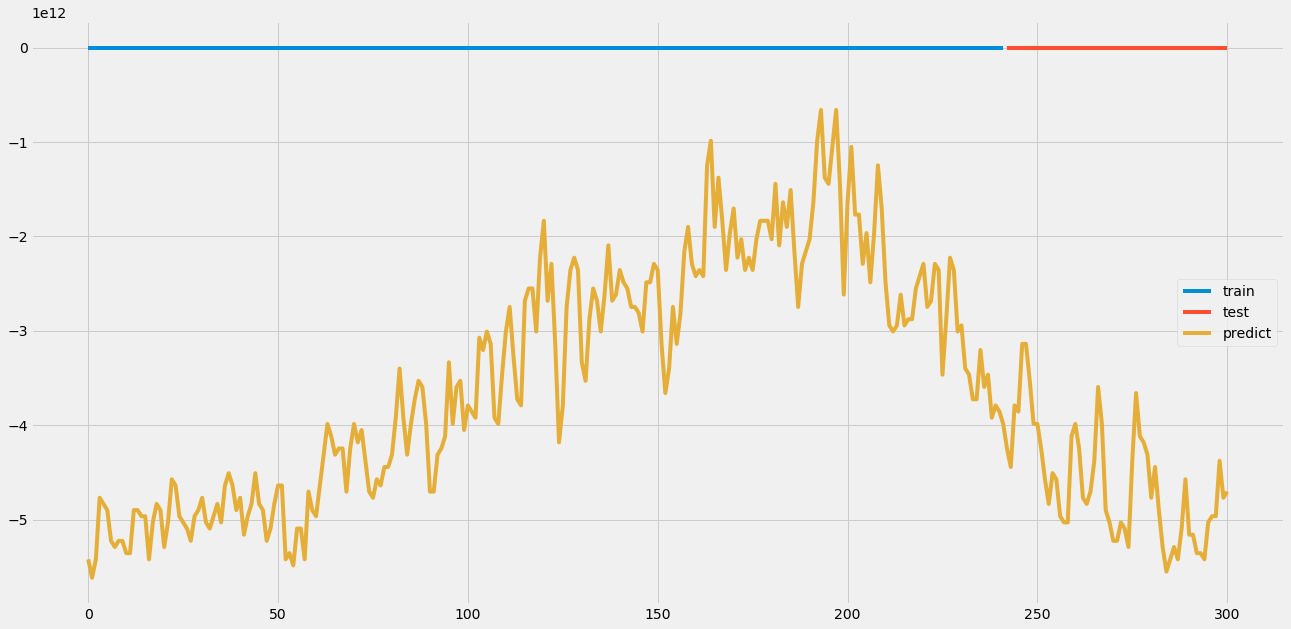

In [6]:
from sklearn.linear_model import SGDRegressor
model = Regressor(analysis, SGDRegressor)
analysis.run_model(model, name='SGD')

'Train Error: 4.30416553373  Num NaN: 0'

'Test Error: 5.17825470198    Num NaN: 0'

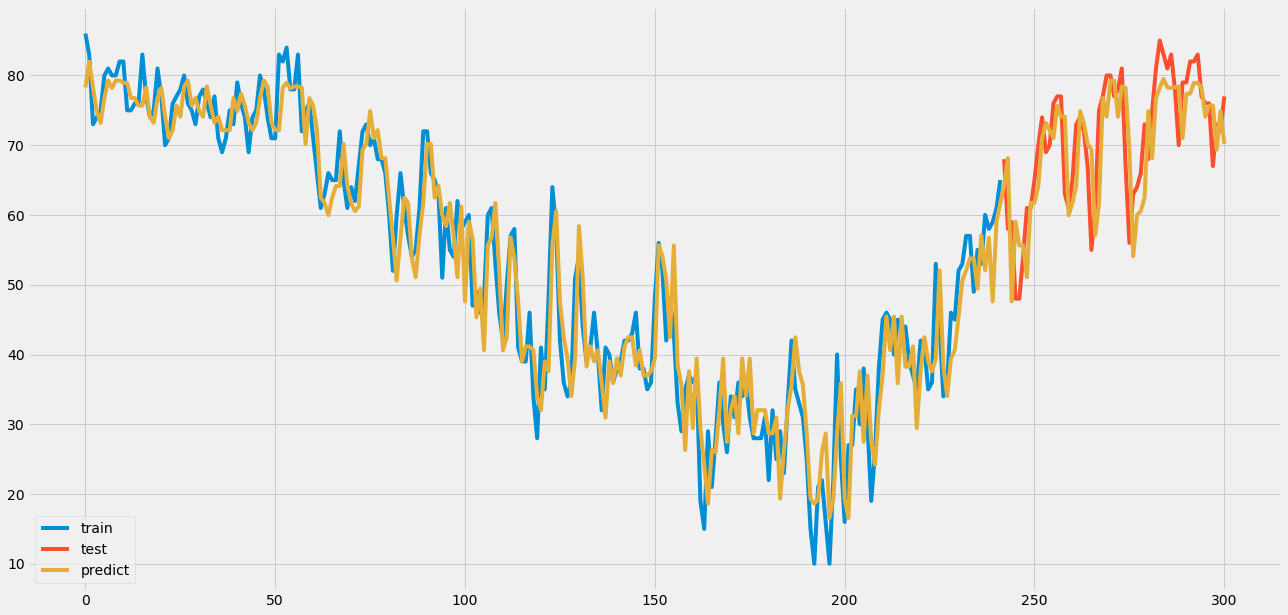

In [7]:
from sklearn.ensemble import RandomForestRegressor
model = Regressor(analysis, RandomForestRegressor)
analysis.run_model(model, name='RandomForest')

'Train Error: 4.64186846105  Num NaN: 0'

'Test Error: 4.85211447421    Num NaN: 0'

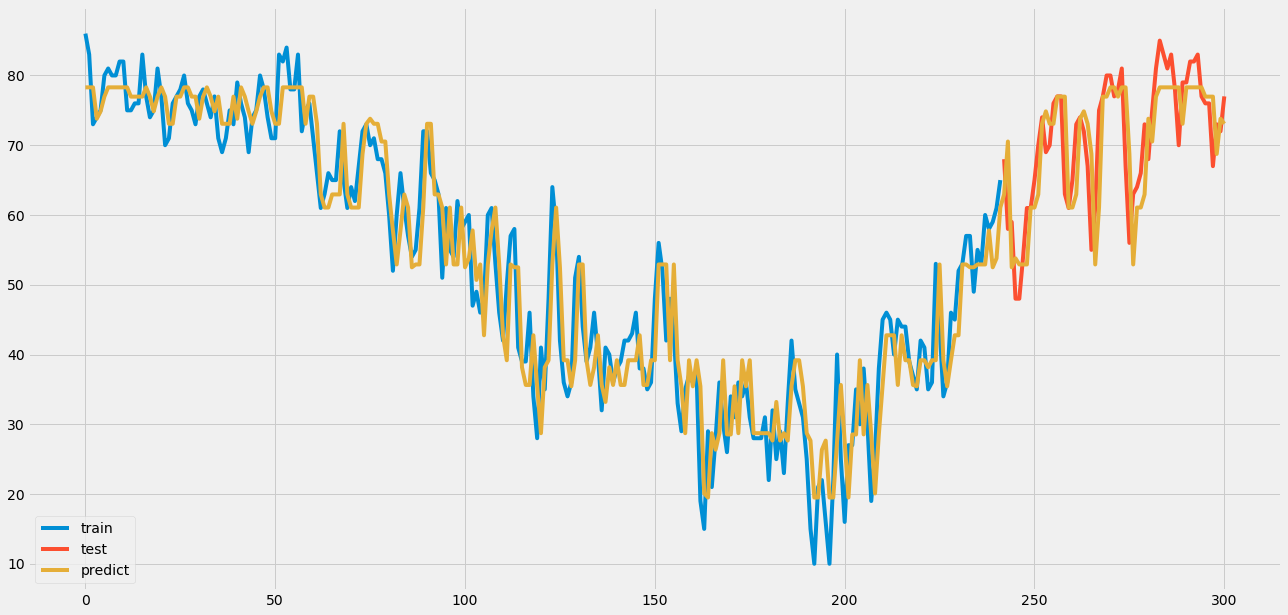

In [8]:
from sklearn.ensemble import AdaBoostRegressor
model = Regressor(analysis, AdaBoostRegressor)
analysis.run_model(model, name='AdaBoost')

'Train Error: 4.16810538995  Num NaN: 0'

'Test Error: 5.22579468206    Num NaN: 0'

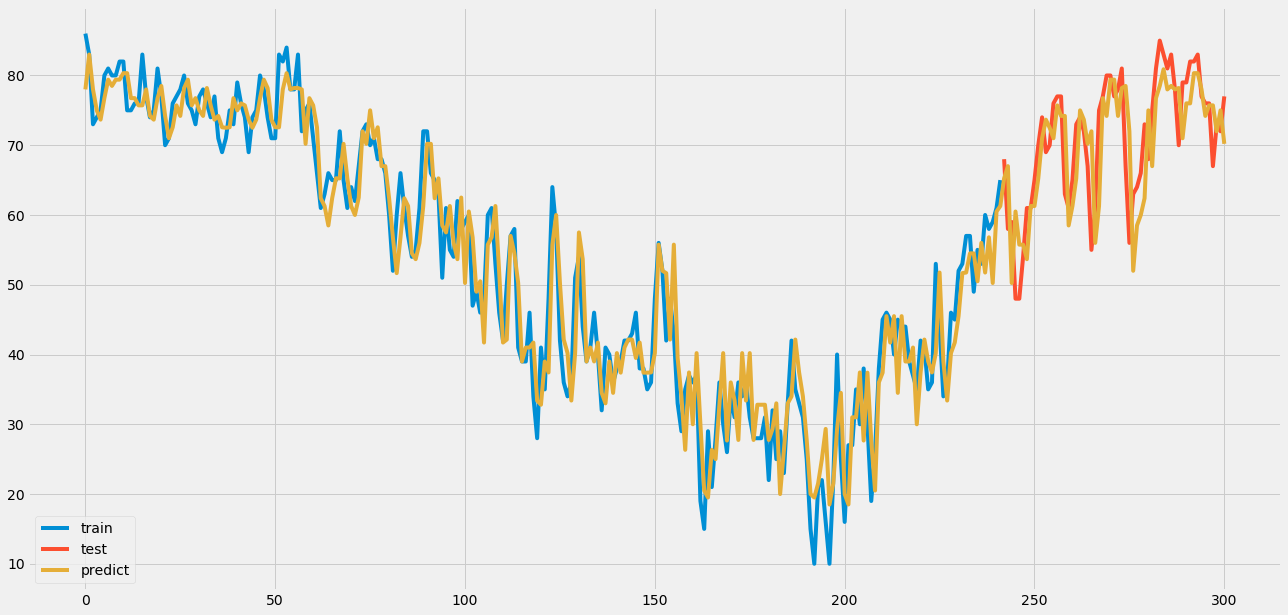

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor
model = Regressor(analysis, GaussianProcessRegressor)
analysis.run_model(model, name='GaussianProcess')

# Chunking Data

Now going to use models that require chunking.  We perform chunking by taking the time series:

x = (x0, x1, x2, x3, ...)
y = (x1, x2, x3, x4, ...)

and modifying it such that if the chunk parameter, c, is set to 3:

x = ((x0, x1, x2), (x1, x2, x3), (x2, x3, x4), ...)
y = (x3, x4, x5, ...)

This results in the first c values in not having a prediction and thus (Num NaN is > 0 and == c).



## LinearRegression

'Train Error: 5.71932777319  Num NaN: 5'

'Test Error: 7.03765523125    Num NaN: 5'

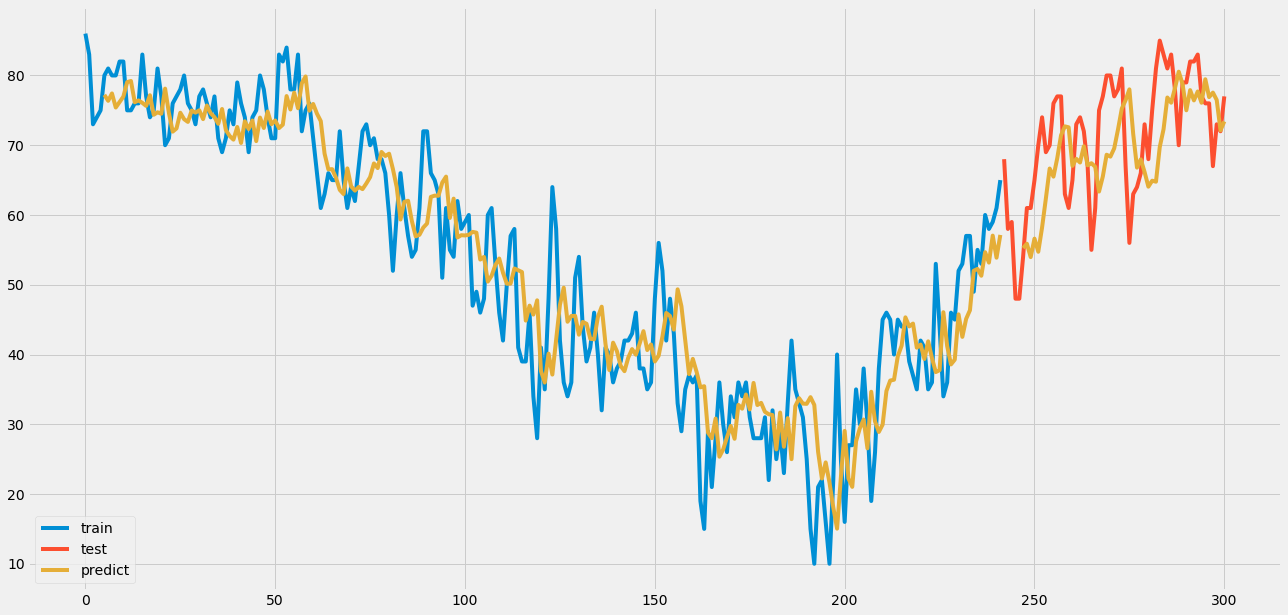

In [10]:
model = LinearRegression(analysis, num_days=NUM_DAYS)
analysis.run_model(model, name='LinearRegression')

## FeedForward Neural Network

Using TensorFlow backend.


Train on 237 samples, validate on 54 samples
Epoch 1/10
 - 1s - loss: 0.2525 - val_loss: 0.2597
Epoch 2/10
 - 0s - loss: 0.2265 - val_loss: 0.2833
Epoch 3/10
 - 0s - loss: 0.2188 - val_loss: 0.2420
Epoch 4/10
 - 0s - loss: 0.2115 - val_loss: 0.2246
Epoch 5/10
 - 0s - loss: 0.2059 - val_loss: 0.1634
Epoch 6/10
 - 0s - loss: 0.1999 - val_loss: 0.1515
Epoch 7/10
 - 0s - loss: 0.1985 - val_loss: 0.2791
Epoch 8/10
 - 0s - loss: 0.2011 - val_loss: 0.2046
Epoch 9/10
 - 0s - loss: 0.1946 - val_loss: 0.2947
Epoch 10/10
 - 0s - loss: 0.1977 - val_loss: 0.2127


'Train Error: 14.3080318467  Num NaN: 5'

'Test Error: 15.9545162342    Num NaN: 5'

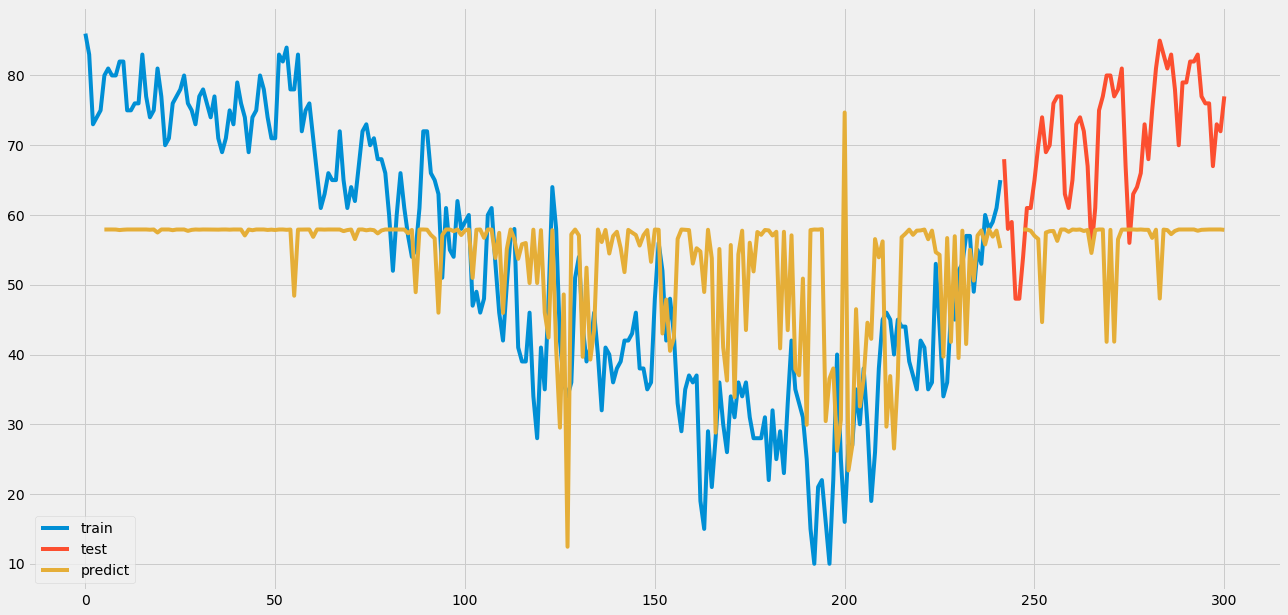

In [11]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.Dense(25, activation='tanh',
                    batch_input_shape=(None, NUM_DAYS * NUM_FEATURES)))
nn.add(layers.Dense(10, activation='tanh'))
nn.add(layers.Dense(1, activation='tanh'))
nn.compile(loss='mae', optimizer='sgd')

model = FNN(analysis, nn, num_days=NUM_DAYS)
analysis.run_model(model, name='FNN')


## Recurrent Neural Network with Single Output

Single output means that the chunked timesteps are input and then the final output of the RNN is used as the prediction.

Train on 237 samples, validate on 54 samples
Epoch 1/10
 - 1s - loss: 0.2834 - val_loss: 0.4144
Epoch 2/10
 - 0s - loss: 0.2360 - val_loss: 0.1896
Epoch 3/10
 - 0s - loss: 0.2480 - val_loss: 0.1462
Epoch 4/10
 - 0s - loss: 0.2314 - val_loss: 0.2545
Epoch 5/10
 - 0s - loss: 0.2398 - val_loss: 0.1082
Epoch 6/10
 - 0s - loss: 0.2322 - val_loss: 0.5096
Epoch 7/10
 - 0s - loss: 0.2455 - val_loss: 0.3819
Epoch 8/10
 - 0s - loss: 0.2412 - val_loss: 0.0942
Epoch 9/10
 - 0s - loss: 0.2448 - val_loss: 0.3340
Epoch 10/10
 - 0s - loss: 0.2385 - val_loss: 0.2544


'Train Error: 16.5090170108  Num NaN: 5'

'Test Error: 19.0797534519    Num NaN: 5'

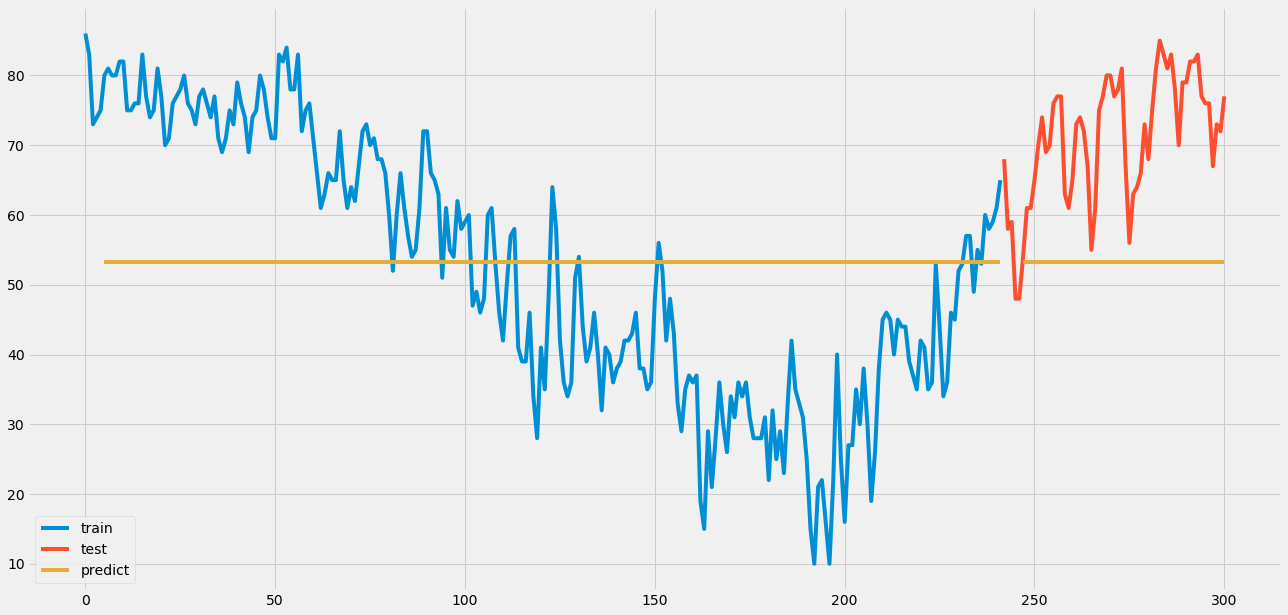

In [12]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.SimpleRNN(50, input_shape=(NUM_DAYS, NUM_FEATURES)))

nn.add(layers.Dense(1, activation='tanh'))
nn.add(layers.Dense(1, activation='linear'))
nn.compile(loss='mae', optimizer=optimizers.RMSprop(lr=0.1))
        
model = RNNSingle(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model, name='RNNSingle')

## Recurrent Neural Network with Multiple Outputs

Multiple outputs means that the chunked data is input and the output at each timestep is used.

In [13]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(NUM_DAYS, NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNMultiple(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model, name='RNNMultiple')

Train on 49 samples, validate on 12 samples
Epoch 1/10
 - 1s - loss: 0.9956 - val_loss: 0.5678
Epoch 2/10
 - 0s - loss: 0.4133 - val_loss: 0.2866
Epoch 3/10
 - 0s - loss: 0.2183 - val_loss: 0.1716
Epoch 4/10
 - 0s - loss: 0.1388 - val_loss: 0.1187
Epoch 5/10
 - 0s - loss: 0.0805 - val_loss: 0.0564
Epoch 6/10
 - 0s - loss: 0.0412 - val_loss: 0.0328
Epoch 7/10
 - 0s - loss: 0.0258 - val_loss: 0.0214
Epoch 8/10
 - 0s - loss: 0.0177 - val_loss: 0.0147
Epoch 9/10
 - 0s - loss: 0.0130 - val_loss: 0.0105
Epoch 10/10
 - 0s - loss: 0.0100 - val_loss: 0.0077


IndexError: index 1 is out of bounds for axis 2 with size 1

## Recurrent Neural Network Complete Sequence

Complete sequence means that the entire sequence is input into the network and each timestep produces an output.  There are no batches, just one long sequence.

In [ ]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(len(analysis.x_train), NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(len(analysis.x_train), NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNAll(analysis, nn, mask_value=mask_value)
analysis.run_model(model, name='RNNAll')